In [1]:
import cooltools
import cooler
from cooltools.eigdecomp import cis_eig
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clr = cooler.Cooler('K562_hg19_chr3_50K.cool')
mat = clr.matrix(balance=True)[:]
mat

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,   0.        , 428.52640111, ...,          nan,
                 nan,          nan],
       [         nan, 428.52640111,   0.        , ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

The FPKM file contains gene expression levels
the H3K27me3 bigwig file contains ChIP-seq normalized signal
the GC file contains GC content data at 50Kb resolution.

In [3]:
phasing = [] #phasing track is correcting for GC content

for line in open('hg19_GC_chr3_50K.txt'):
    line = line.rstrip()
    phasing.append(line)
    phasing_array = np.array(phasing)
    float_phasing_array = phasing_array.astype(float)
print(float_phasing_array)
print(type(float_phasing_array))

[0.      0.16752 0.23058 ... 0.22148 0.06538 0.     ]
<class 'numpy.ndarray'>


To capture the pattern of compartmentalization within-chromosomes, in cis, cooltools cis_eig first removes the dependence of contact frequency by distance, and then performs eigenedecompostion

Basically finding eigen vectors and values of this matrix

In [4]:
cis_eigs = cooltools.eigdecomp.cis_eig(mat, n_eigs=1, phasing_track=float_phasing_array)
cis_eigs

(array([5531.58103207]),
 array([[        nan, -0.07931084,  0.08391484, ...,         nan,
                 nan,         nan]]))

#### Plot the first eigen vector, along with the interaction matrix such that you can see the relationship between eigen vector scores and compartment patterns in the Hi-C data (compartment scores over heatmap). You may need to play with the vmax argument in the matplotlib matshow function to get a good dynamic range of the data (this puts a cap on the maximum score displayed). I used ten times the median score of all of the nonzero interactions, but you can play around with this number if you like.

Hint: You can look at the examples in the documentation for ways to nicely combine the two plots.
Create a bed file from the first eigen vector with each ‘A’ and ‘B’ region as determined by the sign of the eigen vector score.

vmax = resolution; any score higher than x numbr will be cut off and predent it's lower than it actually is 

/opt/anaconda3/envs/hic/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


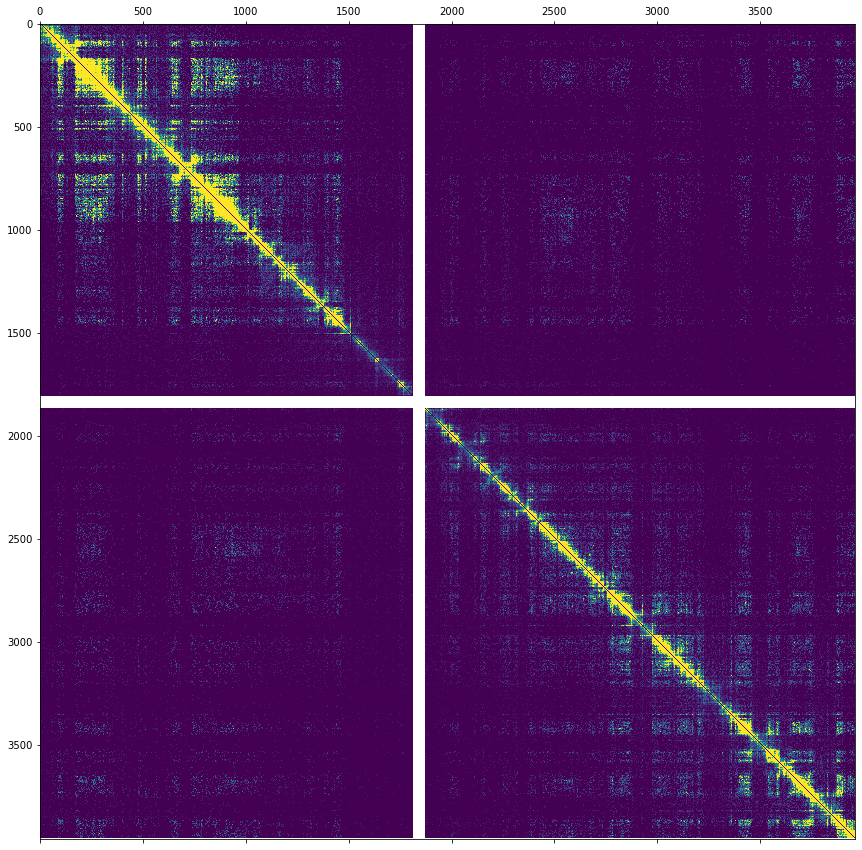

In [5]:
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(mat, vmax=10) 
fig.show()


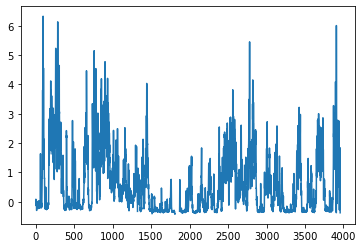

In [6]:
plt.plot(np.arange(cis_eigs[1].shape[1]), cis_eigs[1][0,:])
plt.show()


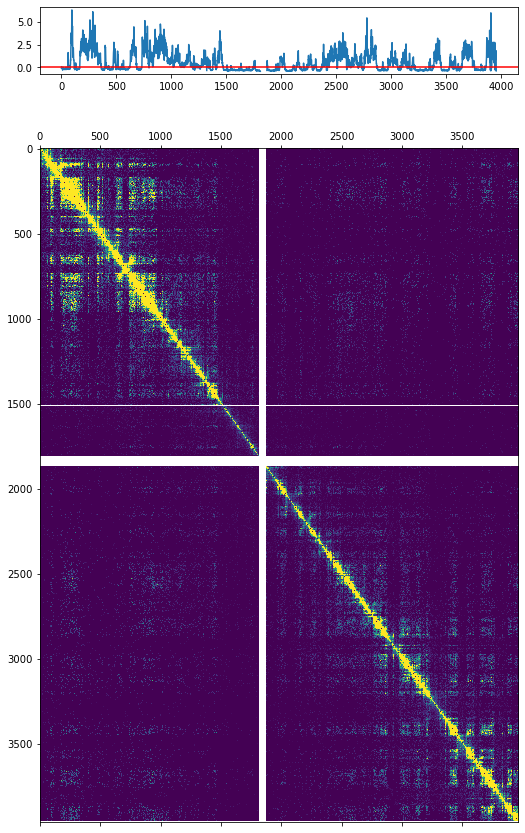

In [7]:
import matplotlib.gridspec as grd

plt.figure(figsize = (15, 15))

gs = grd.GridSpec(2, 2, height_ratios=[1,10], width_ratios=[6,1], wspace=1)
ax = plt.subplot(gs[2])
ax = ax.matshow(mat, aspect="auto", vmax=10)
ax2 = plt.subplot(gs[0])
ax2.plot(np.arange(cis_eigs[1].shape[1]), cis_eigs[1][0,:])
plt.axhline(y=0, color='r')
plt.show()

#### Create a bed file from the first eigen vector with each ‘A’ and ‘B’ region as determined by the sign of the eigen vector score.

In [8]:
vector = cis_eigs[1][0] #just take vector, not value
vector.size #number of vals in array; each entry in eigenvector corresponds to a 50kb region in GC.txt file

3961

In [9]:
vector

array([        nan, -0.07931084,  0.08391484, ...,         nan,
               nan,         nan])

In [10]:
for i in range(30): #each value = 50kb of sequences
    print(vector[i])

nan
-0.07931083826290435
0.08391483795285734
0.020301722842777033
-0.004100291122681861
-0.01798649968357054
-0.1363552482575583
-0.05943947353149831
-0.020357441132418802
0.0019385587536206207
-0.06425311600208206
-0.25979067733140926
-0.2979900713737611
-0.15782970193376675
-0.1157767935944717
-0.16733585283700458
-0.04005228198402534
-0.11484701248461603
-0.13116337496396763
0.009646915820457496
-0.14133459695987116
-0.19933209207888564
-0.18218469252425795
-0.14598115603130485
-0.11027670231837491
-0.08549842212573035
-0.15079332592571296
-0.22372000542014384
-0.1444153916547013
-0.14335134882189066


In bedfile:
0       - 500,000 A(+)
500,000 - 550,000 B(-)

In [11]:
positions = np.arange(0, 198050000, 50000) 
positions

array([        0,     50000,    100000, ..., 197900000, 197950000,
       198000000])

In [12]:
AB = []
filtered_pos = []
for i in range(len(vector)):
    if np.isnan(vector[i]):
        continue
    elif vector[i] > 0:
        AB.append("A")
        filtered_pos.append(positions[i])
    elif vector[i] < 0:
        AB.append("B")
        filtered_pos.append(positions[i])

#print(AB)
print(filtered_pos)
    

[50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000, 1050000, 1100000, 1150000, 1200000, 1250000, 1300000, 1350000, 1400000, 1450000, 1500000, 1550000, 1600000, 1650000, 1700000, 1750000, 1800000, 1850000, 1900000, 1950000, 2000000, 2050000, 2100000, 2150000, 2200000, 2250000, 2300000, 2350000, 2400000, 2450000, 2500000, 2550000, 2600000, 2650000, 2700000, 2750000, 2800000, 2850000, 2900000, 2950000, 3000000, 3050000, 3100000, 3150000, 3200000, 3250000, 3300000, 3350000, 3400000, 3450000, 3500000, 3550000, 3600000, 3650000, 3700000, 3750000, 3800000, 3850000, 3900000, 3950000, 4000000, 4050000, 4100000, 4150000, 4200000, 4250000, 4300000, 4350000, 4400000, 4450000, 4500000, 4550000, 4600000, 4650000, 4700000, 4750000, 4800000, 4850000, 4900000, 4950000, 5000000, 5050000, 5100000, 5150000, 5200000, 5250000, 5300000, 5350000, 5400000, 5450000, 5500000, 5550000, 5600000, 5650000, 57

In [13]:
sign_switch = []
for i in range(1, len(AB)):
    if AB[i] == AB[i-1]:
        continue
    else:
        sign_switch.append(i)
        
sign_switch
#len(sign_switch)
        

[1,
 3,
 8,
 9,
 18,
 19,
 41,
 43,
 58,
 65,
 79,
 117,
 127,
 135,
 167,
 362,
 396,
 409,
 410,
 412,
 414,
 419,
 425,
 426,
 429,
 434,
 463,
 464,
 470,
 495,
 505,
 506,
 507,
 518,
 546,
 556,
 563,
 567,
 617,
 622,
 623,
 686,
 732,
 797,
 798,
 1116,
 1117,
 1194,
 1200,
 1210,
 1215,
 1217,
 1218,
 1232,
 1233,
 1244,
 1245,
 1254,
 1256,
 1258,
 1259,
 1260,
 1265,
 1267,
 1268,
 1322,
 1324,
 1341,
 1343,
 1344,
 1346,
 1353,
 1376,
 1404,
 1409,
 1410,
 1411,
 1412,
 1414,
 1471,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1537,
 1541,
 1627,
 1633,
 1680,
 1681,
 1705,
 1706,
 1740,
 1741,
 1742,
 1743,
 1747,
 1753,
 1754,
 1760,
 1808,
 1814,
 1886,
 1891,
 1899,
 1903,
 1905,
 1910,
 1924,
 1970,
 2042,
 2044,
 2046,
 2054,
 2074,
 2103,
 2104,
 2107,
 2108,
 2109,
 2116,
 2117,
 2140,
 2142,
 2169,
 2173,
 2176,
 2178,
 2179,
 2218,
 2232,
 2234,
 2235,
 2236,
 2240,
 2244,
 2245,
 2257,
 2306,
 2311,
 2312,
 2347,
 2358,
 2444,
 2449,
 2533,
 2534,
 2569,
 2570,
 25

In [14]:
start_list = [filtered_pos[0]]
for i in range(1, len(sign_switch)):
    start_list.append(filtered_pos[sign_switch[i-1]])
start_list
#len(start_list)

[50000,
 100000,
 200000,
 450000,
 500000,
 950000,
 1000000,
 2100000,
 2200000,
 2950000,
 3300000,
 4000000,
 5900000,
 6400000,
 6800000,
 8400000,
 18150000,
 19850000,
 20500000,
 20550000,
 20650000,
 20750000,
 21000000,
 21300000,
 21350000,
 21500000,
 21750000,
 23200000,
 23250000,
 23550000,
 24800000,
 25300000,
 25350000,
 25400000,
 25950000,
 27350000,
 27850000,
 28200000,
 28400000,
 30900000,
 31150000,
 31200000,
 34350000,
 36650000,
 39900000,
 39950000,
 55850000,
 55900000,
 59750000,
 60050000,
 60550000,
 60800000,
 60900000,
 60950000,
 61650000,
 61700000,
 62250000,
 62300000,
 62750000,
 62850000,
 62950000,
 63000000,
 63050000,
 63300000,
 63400000,
 63450000,
 66150000,
 66300000,
 67150000,
 67250000,
 67300000,
 67400000,
 67750000,
 68900000,
 70300000,
 70550000,
 70600000,
 70650000,
 70700000,
 70800000,
 73650000,
 75250000,
 75300000,
 75350000,
 75400000,
 75450000,
 75500000,
 77100000,
 77300000,
 81600000,
 81900000,
 84250000,
 84300000,


In [15]:
print(start_list[0])
print(filtered_pos[1])

50000
100000


In [16]:
AB

['B',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B'

In [23]:
f = open("bedfile.bed", "w")
for i in range(len(sign_switch)):
    f.write('\t'.join(["chr3", str(start_list[i]), str(filtered_pos[sign_switch[i]]), str(AB[sign_switch[i]-1])+'\n']))

f.close()
        


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
col_names= ["chr", "start", "end", "gene", "FPKM", "strand"]
df = pd.read_csv('K562_hg19_FPKM_chr3.bed', names=col_names, sep="\t", header=None)
df

,chr,start,end,gene,FPKM,strand
0,chr3,238279,451090,CHL1,0.00,+
1,chr3,1134260,1445901,CNTN6,0.00,+
2,chr3,2140497,3099645,CNTN4,0.01,+
3,chr3,3111233,3168297,IL5RA,0.14,-
4,chr3,3168600,3192563,TRNT1,25.28,+
...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,53.14,+
1060,chr3,197518097,197615307,LRCH3,24.13,+
1061,chr3,197615946,197687013,IQCG,3.70,-
1062,chr3,197676858,197683481,RPL35A,1195.67,+


In [20]:
df["FPKM"] = np.log2(df["FPKM"]+1)
df

,chr,start,end,gene,FPKM,strand
0,chr3,238279,451090,CHL1,0.000000,+
1,chr3,1134260,1445901,CNTN6,0.000000,+
2,chr3,2140497,3099645,CNTN4,0.014355,+
3,chr3,3111233,3168297,IL5RA,0.189034,-
4,chr3,3168600,3192563,TRNT1,4.715893,+
...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,5.758623,+
1060,chr3,197518097,197615307,LRCH3,4.651339,+
1061,chr3,197615946,197687013,IQCG,2.232661,-
1062,chr3,197676858,197683481,RPL35A,10.224810,+


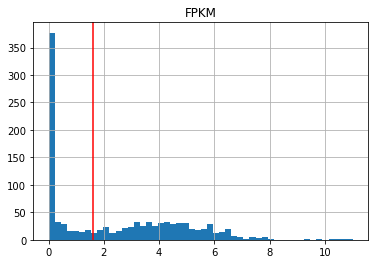

In [21]:
hist = df.hist(column=["FPKM"], bins=50)
plt.axvline(x=1.6, ymax=1, color='r')

1) Adjust H3kme7 scores
2) Map H3 scores onto genes using bedtools map
3) Normalize gene length
4) Map onto compartments

$bedtools map -a K562_hg19_FPKM_chr3.bed -b K562_hg19_H3K27me3_chr3_norm.bg > me3_gene_map.bed

$awk 'BEGIN{OFS="\t"}{$7=$7 / ($3-$2); print $1,$2,$3,$4,$5,$6,$7}' me3_gene_map.bed > K562_hg19_FPKM_chr3_mapnorm.bed

$bedtools map -a K562_hg19_FPKM_chr3_mapnorm.bed -b bedfile.bed -o distinct -f 0.5 -c 4 > ABmapped.bed

-c default 5 parameters, switch to 4
-f Minimum overlap required as a fraction of A. Default is 1E-9 (i.e. 1bp).

FPKM = gene expression; over red line threshold

Need to subset out data for A-expressed (FPKM > 1.6), B-expressed, etc.)

In [26]:
col_names2 = ["chr", "start", "end", "gene", "FPKM", "strand", "methylation", "compartment"]
ABmapped = pd.read_csv('ABmapped.bed', sep='\t', names = col_names2, header=None)
ABmapped

,chr,start,end,gene,FPKM,strand,methylation,compartment
0,chr3,238279,451090,CHL1,0.00,+,0.217979,B
1,chr3,1134260,1445901,CNTN6,0.00,+,0.212417,B
2,chr3,2140497,3099645,CNTN4,0.01,+,0.271694,B
3,chr3,3111233,3168297,IL5RA,0.14,-,1.567160,A
4,chr3,3168600,3192563,TRNT1,25.28,+,0.168837,A
...,...,...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,53.14,+,0.170634,A
1060,chr3,197518097,197615307,LRCH3,24.13,+,0.174287,A
1061,chr3,197615946,197687013,IQCG,3.70,-,0.264840,A
1062,chr3,197676858,197683481,RPL35A,1195.67,+,0.173857,A


In [38]:
A_expressed = ABmapped.loc[(ABmapped["FPKM"] > 1.6) & (ABmapped["compartment"] == "A")]
B_expressed = ABmapped.loc[(ABmapped["FPKM"] > 1.6) & (ABmapped["compartment"] == "B")]

,chr,start,end,gene,FPKM,strand,methylation,compartment
4,chr3,3168600,3192563,TRNT1,25.28,+,0.168837,A
5,chr3,3190676,3221394,CRBN,28.67,-,0.140221,A
6,chr3,3742498,4508965,SUMF1,3.17,-,0.391641,A
8,chr3,4344988,4359251,SETMAR,13.61,+,0.180047,A
9,chr3,4535032,4889524,ITPR1,12.43,+,0.387860,A
...,...,...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,53.14,+,0.170634,A
1060,chr3,197518097,197615307,LRCH3,24.13,+,0.174287,A
1061,chr3,197615946,197687013,IQCG,3.70,-,0.264840,A
1062,chr3,197676858,197683481,RPL35A,1195.67,+,0.173857,A


In [40]:
A_unexpressed = ABmapped.loc[(ABmapped["FPKM"] < 1.6) & (ABmapped["compartment"] == "A")]
B_unexpressed = ABmapped.loc[(ABmapped["FPKM"] < 1.6) & (ABmapped["compartment"] == "B")]

In [43]:
print(A_expressed["methylation"])

4       0.168837
5       0.140221
6       0.391641
8       0.180047
9       0.387860
          ...   
1059    0.170634
1060    0.174287
1061    0.264840
1062    0.173857
1063    0.141797
Name: methylation, Length: 561, dtype: float64


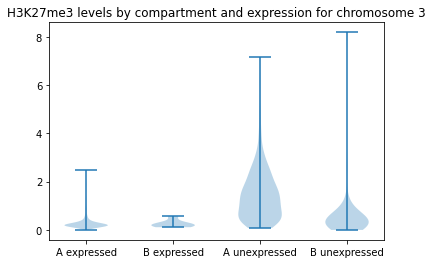

In [56]:
fig, ax = plt.subplots()

ax.violinplot([A_expressed["methylation"], B_expressed["methylation"], A_unexpressed["methylation"], B_unexpressed["methylation"]])

plt.xticks(ticks=[1, 2, 3, 4], labels = ["A expressed", "B expressed", "A unexpressed", "B unexpressed"])

ax.set_title('H3K27me3 levels by compartment and expression for chromosome 3')

plt.show()